In [14]:
import pandas
import os
import torch
import ast
import numpy as np
from swarm_visualizer.boxplot import  plot_paired_boxplot
from swarm_visualizer.utility.general_utils import save_fig, set_plot_properties
from matplotlib import pyplot as plt
import warnings
import seaborn as sns
from seaborn import lineplot,scatterplot
warnings.filterwarnings('ignore')
from prettytable import PrettyTable
import plotly.express as px
from utils import write_to_csv_from_dict
from copy import deepcopy
from tqdm import tqdm
import torch.utils.data.dataloader as DataLoader

# WAYMO CLASS METADATA

In [15]:
# WAYMO CLASS METADATA

from waymo_open_data import WaymoDataset
import omegaconf
from dataset import collate_fn as collator
import functools

config_file_name = 'waymo_config.yaml'
config = omegaconf.OmegaConf.load(config_file_name)
waymo_dataset = WaymoDataset(config.IMAGE.WAYMO, image_meta_data=True)

class_meta_file_path = '../waymo_open_data/waymo_class_metadata.csv'
CLASSES = waymo_dataset.CLASSES
keys = list(waymo_dataset.METADATA[0].keys())
keys += CLASSES
data_dict= {k:k for k in keys}
write_to_csv_from_dict(
            dict_data=data_dict , 
            csv_file_path= class_meta_file_path,
            file_name=""
    )

collate_fn = functools.partial(
                collator, 
                segmentation=waymo_dataset.segmentation,
                image_meta_data=waymo_dataset.image_meta_data
            )

dataloader = DataLoader.DataLoader(
            dataset=waymo_dataset,
            batch_size=16,
            shuffle=False,
            collate_fn=collate_fn,
            num_workers=4
        )

In [16]:
# Obtain all the classes within the dataset

for _,data in tqdm(enumerate(dataloader), total=len(dataloader)):
    
    imgs = data[0]
    masks = data[3]
    metas = data[4]
    
    for img, mask, meta in zip(imgs, masks, metas):
        object_set = set(mask.flatten().tolist())
        object_classes = set([CLASSES[object] for object in object_set])
        data_dict = deepcopy(meta)
        del data_dict['condition']
        for sem in CLASSES:
            if sem in object_classes:
                data_dict[sem] = 1
            else:
                data_dict[sem] = 0
                
        write_to_csv_from_dict(
            dict_data=data_dict ,
            csv_file_path= class_meta_file_path,
            file_name=""
        )
   
    

  0%|          | 0/2477 [04:35<?, ?it/s]


KeyboardInterrupt: 

In [28]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import os

In [29]:
# Convert all images from cv2 imwrite to PIL Image

DIR_PATH = '/store/harsh/data/waymo_synthetic_ft/img/'
for file in os.listdir(DIR_PATH):
    if file.endswith('.png'):
        img = cv2.imread(os.path.join(DIR_PATH, file))
        pil_img = Image.fromarray(img)
        pil_img.save(os.path.join(DIR_PATH, file))


KeyboardInterrupt: 

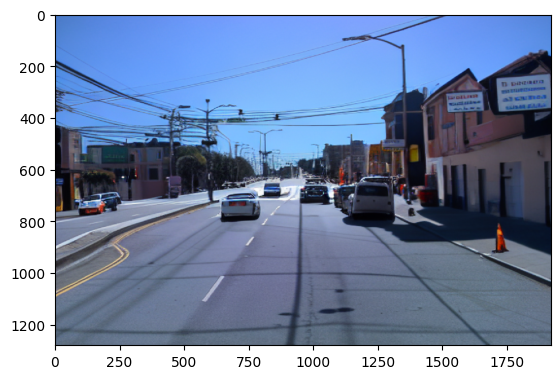

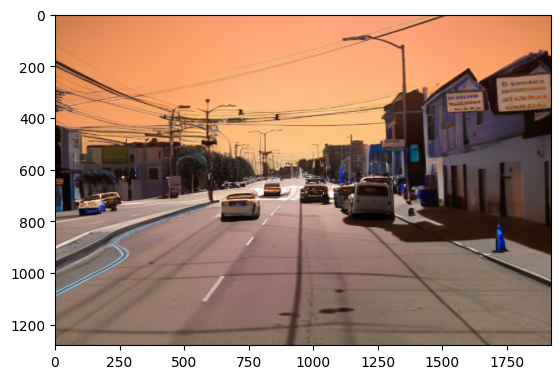

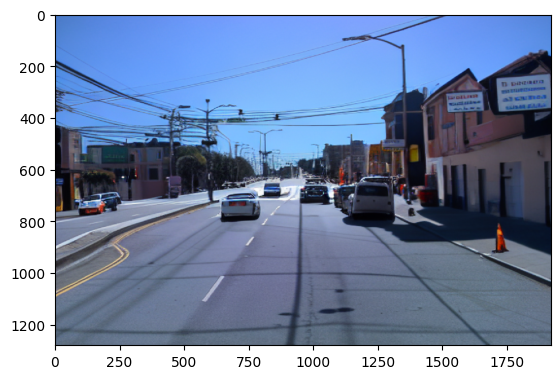

In [26]:
# PATH
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
path = '/store/harsh/data/waymo_synthetic_ft_ceq_rct/img/16102220208346880_1420_000_1440_000_1554232903758779_0_619_1_49.png'
img = cv2.imread(path)
plt.imshow(img)
plt.show()
color_coverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(color_coverted)
plt.show()
pil_img = Image.fromarray(img)
plt.imshow(np.array(pil_img))
plt.show()
# plt.imshow(img)
# plt.show()


# plt.imshow(np.array(img))
# plt.show()

# path2 = '/store/datasets/bdd100k/images/10k/train/0a6b4a7c-842bfdae.jpg'
# img = cv2.imread(path2)
# plt.imshow(img)
# plt.show()

# img = Image.open(path2)
# plt.imshow(np.array(img))
# plt.show()

